In [ ]:
import torch
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Lambda
import torch.nn as nn
import random

a:

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



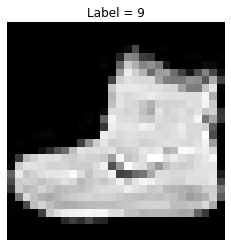

In [ ]:
img, label = training_data[0]
plt.title(f"Label = {label}")
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
plt.show()

In [ ]:
print(f"Shape of the image of the first data: {training_data[1][0].shape}")
print(f"Label of the first data: {training_data[1000][1]}")

Shape of the image of the first data: torch.Size([1, 28, 28])
Label of the first data: 1


In [ ]:
images = []
for j in range(10):
  s = [i for i in range(60000) if training_data[i][1]==j]
  images.append(random.choice(s))

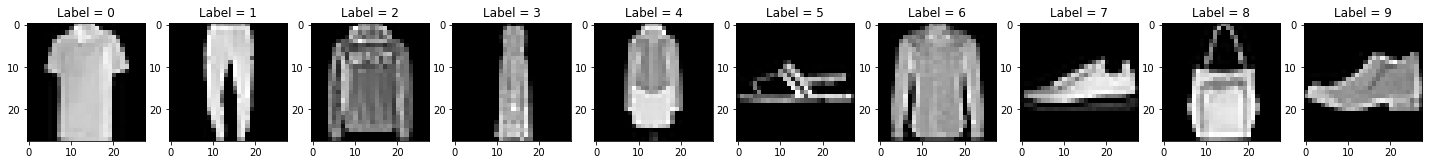

In [ ]:
fig = plt.figure(figsize=(25, 10))
columns = 10
rows = 1
for i in range(columns*rows):
    img = training_data[images[i]][0]
    fig.add_subplot(rows, columns, i+1)
    plt.title(f"Label = {training_data[images[i]][1]}")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

b:

In [ ]:
#https://d2l.ai/chapter_linear-classification/softmax-regression-scratch.html

def My_ReLU(x):
  return x * (x > 0)

def My_SoftMax(X):
    X_exp = torch.exp(X.to(torch.float64))
    partition = X_exp.sum(1, keepdims=True)
    return (X_exp / partition).to(torch.float)

In [ ]:
torch.manual_seed(32)
W1 = torch.empty((784, 400), dtype=torch.double, requires_grad=True)
W2 = torch.empty((400, 10), dtype=torch.double, requires_grad=True)
W3 = torch.empty((10, 10), dtype=torch.double, requires_grad=True)
nn.init.uniform_(W1, a=-0.8, b =0.8)
nn.init.uniform_(W2, a=-0.8, b =0.8)
nn.init.uniform_(W3, a=-0.8, b =0.8)
B1 = torch.empty((1, 400), dtype=torch.double, requires_grad=True)
B2 = torch.empty((1, 10), dtype=torch.double, requires_grad=True)
B3 = torch.empty((1, 10), dtype=torch.double, requires_grad=True)
nn.init.uniform_(B1, a=-0.8, b =0.8)
nn.init.uniform_(B2, a=-0.8, b =0.8)
nn.init.uniform_(B3, a=-0.8, b =0.8)
def model(xb):
  # calculate hidden and output layers
  # xb = xb.squeeze().reshape(batch_size,28*28)
  h1 = My_ReLU((xb @ W1) + B1)
  h2 = My_ReLU((h1 @ W2) + B2)
  h3 = My_ReLU((h2 @ W3) + B3)
  return My_SoftMax(h3)

c:

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor())
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor())

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
def loss_function(predicted, true):
  y_h = lambda y : torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
  na = []
  for i in true:
    na.append(np.array(y_h(i)))
  on_h_label = torch.tensor(na)
  CEL = 0
  for i, j  in zip(predicted, on_h_label):
    CEL-= torch.matmul(j, torch.log(i+0.1).T)
  return CEL

In [ ]:
def train_loop(dataloader, model, loss_fn, learning_rate):
  global W1, B1, W2, B2, W3, B3
  size = len(dataloader.dataset)
  for N_batch, (X, y) in enumerate(dataloader):

    pred = model(X.squeeze().reshape(-1,784).to(torch.double))
    loss = loss_function(pred, y)
    loss.backward()

    g_0, g_1, g_2 = W1.grad, W2.grad, W3.grad
    g_3, g_4, g_5 = B1.grad, B2.grad, B3.grad

    W1, W2, W3 = W1.detach(), W2.detach(), W3.detach()
    B1, B2, B3 = B1.detach(), B2.detach(), B3.detach()

    W1-=0.001*g_0
    W2-=0.001*g_1
    W3-=0.001*g_2

    B1-=0.001*g_3
    B2-=0.001*g_4
    B3-=0.001*g_5

    W1, W2, W3, B1, B2, B3 = W1.requires_grad_(), W2.requires_grad_(), W3.requires_grad_(), B1.requires_grad_(), B2.requires_grad_(), B3.requires_grad_()
    if N_batch % 100 == 0:
      loss, current = loss.item(), N_batch * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.squeeze().reshape(-1,784).to(torch.double))
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 60
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_function, learning_rate=1e-3)
    test_loop(test_dataloader, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 126.384018  [    0/60000]


<ipython-input-41-e3e05949fc18>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_h = lambda y : torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
<ipython-input-41-e3e05949fc18>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  on_h_label = torch.tensor(na)
<ipython-input-41-e3e05949fc18>:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered intern

loss: 120.318214  [ 6400/60000]
loss: 98.336723  [12800/60000]
loss: 99.164711  [19200/60000]
loss: 83.781708  [25600/60000]
loss: 72.054420  [32000/60000]
loss: 67.666000  [38400/60000]
loss: 75.073387  [44800/60000]
loss: 53.289219  [51200/60000]
loss: 61.399464  [57600/60000]
Test Error: 
 Accuracy: 54.5%, Avg loss: 59.184870 

Epoch 2
-------------------------------
loss: 59.343079  [    0/60000]
loss: 64.833733  [ 6400/60000]
loss: 52.456070  [12800/60000]
loss: 47.144062  [19200/60000]
loss: 53.839096  [25600/60000]
loss: 65.083565  [32000/60000]
loss: 53.423691  [38400/60000]
loss: 46.239292  [44800/60000]
loss: 42.870850  [51200/60000]
loss: 64.124931  [57600/60000]
Test Error: 
 Accuracy: 65.9%, Avg loss: 43.708513 

Epoch 3
-------------------------------
loss: 37.403854  [    0/60000]
loss: 37.401192  [ 6400/60000]
loss: 34.725975  [12800/60000]
loss: 46.650131  [19200/60000]
loss: 41.334274  [25600/60000]
loss: 43.906712  [32000/60000]
loss: 51.296028  [38400/60000]
loss: 3

d:

In [ ]:
test_loop(test_dataloader, model, loss_function)

<ipython-input-41-e3e05949fc18>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_h = lambda y : torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)


Test Error: 
 Accuracy: 85.7%, Avg loss: 13.426608 



In [ ]:
from torch.utils.data import DataLoader
test_dataloader = DataLoader(test_data, batch_size=10000, shuffle=True)
for i,j in test_dataloader:
  X =i
  y =j
sequence = [i for i in range(10000)]
from random import sample
subset = sample(sequence, 9)
pred = model(X[subset].squeeze().reshape(-1,784).to(torch.double))
print("True labels\n", y[subset])
print("predicted labels\n", pred.argmax(1))

True labels
 tensor([0, 8, 2, 5, 7, 7, 3, 5, 0])
predicted labels
 tensor([0, 8, 2, 5, 7, 9, 3, 5, 0])


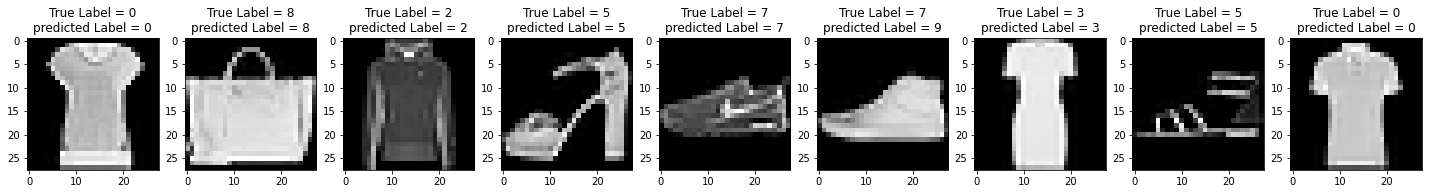

In [ ]:
fig = plt.figure(figsize=(25, 10))
columns = 9
rows = 1
for i in range(columns*rows):
    img = X[subset].squeeze()[i]
    fig.add_subplot(rows, columns, i+1)
    plt.title(f"True Label = {y[subset][i]}\npredicted Label = {pred.argmax(1)[i]}")
    plt.imshow(img, cmap="gray")
plt.show()